In [17]:
from astropy.io import fits

In [18]:
eventfile=fits.open('sw01088940000bevshsp_uf.evt.gz')

In [19]:
events=eventfile[1].data

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]

In [22]:
cleanevts = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]

**Excercise: in words, describe the gamma-ray burst and relevant parameters, its structure and characteristics in time and energy. Try to think about how you might quantify some of these characteristics, like duration, spikiness, energy, etc, and if you can come up with a way of measuring them from the data.**

Text(0.5, 0, 'Time (s)')

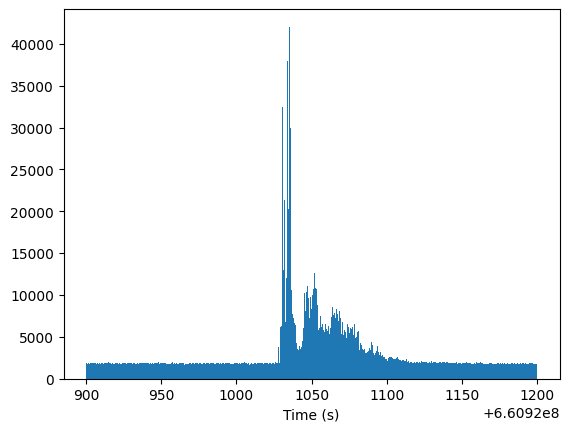

In [23]:
_=plt.hist(shortdat['TIME'],bins=1000)
plt.xlabel('Time (s)')

In [24]:
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]

In [25]:
shorterdat = filterdat[(filterdat['TIME']>660921026) & (filterdat['TIME']<660921120)]
shorterdat

FITS_rec([(6.60921026e+08, 16399, 0, 2471,  0.00050388,  19,  18,  603,   60),
          (6.60921026e+08, 14639, 0, 2469,  0.        , 262, 132,  398,   39),
          (6.60921026e+08, 16694, 0, 2590,  0.        ,  24,  39,  208,   20),
          ...,
          (6.60921120e+08, 30752, 0, 1620, -0.00014705, 274,  11, 2296,  229),
          (6.60921120e+08, 27603, 0, 2675,  0.00010127, 208,  70,  184,   18),
          (6.60921120e+08, 29709, 0, 2558,  0.00020711, 217,  16,  287,   28)],
         dtype=(numpy.record, [('TIME', '>f8'), ('DET_ID', '>i2'), ('EVENT_FLAGS', 'u1'), ('PHA', '>i2'), ('MASK_WEIGHT', '>f4'), ('DETX', '>i2'), ('DETY', '>i2'), ('PI', '>i2'), ('ENERGY', '>i2')]))

In [26]:
import pandas as pd
df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df

,TIME,DET_ID,EVENT_FLAGS,PHA,MASK_WEIGHT,DETX,DETY,PI,ENERGY
0,6.609209e+08,7229,0,1027,0.000000,134,156,4602,460.2
1,6.609209e+08,25464,0,2836,0.000000,177,84,380,38.0
2,6.609209e+08,29228,0,2710,0.000000,239,59,153,15.3
3,6.609209e+08,31805,0,2533,0.000258,259,16,477,47.7
4,6.609209e+08,14945,0,2694,0.000000,255,111,274,27.4
...,...,...,...,...,...,...,...,...,...
2593297,6.609212e+08,19507,0,1137,0.000208,42,14,3533,353.3
2593298,6.609212e+08,18963,0,2643,0.000127,56,58,212,21.2
2593299,6.609212e+08,23606,0,2610,0.000222,114,17,263,26.3
2593300,6.609212e+08,26643,0,2640,-0.000167,200,14,185,18.5


Text(0, 0.5, 'Energy (keV)')

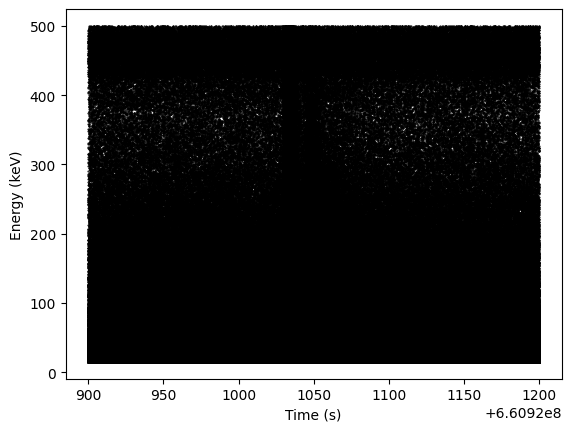

In [27]:
plt.plot(df['TIME'], df['ENERGY'], 'k.', markersize=1)
plt.xlabel('Time (s)')
plt.ylabel('Energy (keV)')